Dataset shape: (3023, 50, 37)
Number of classes (people): 62


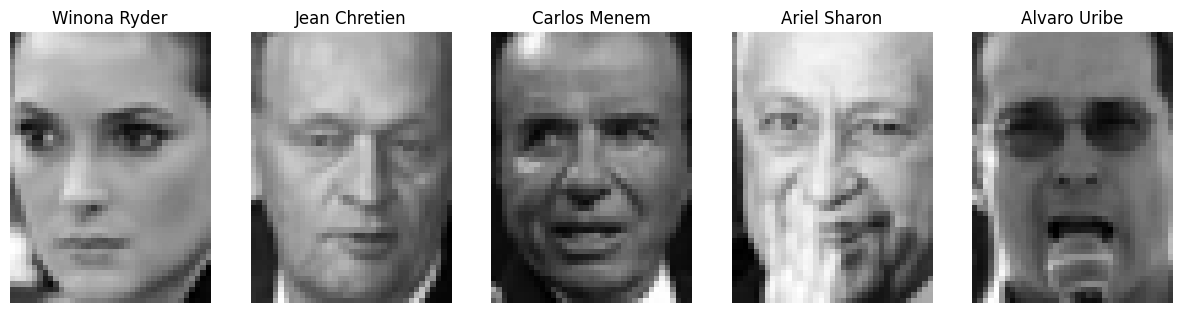

In [ ]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
faces = fetch_lfw_people(min_faces_per_person=20, resize=0.4)
print("Dataset shape:", faces.images.shape)
print("Number of classes (people):", len(faces.target_names))
fig, axes = plt.subplots(1, 5, figsize=(15, 8))
for i, ax in enumerate(axes):
    ax.imshow(faces.images[i], cmap='gray')
    ax.set_title(faces.target_names[faces.target[i]][:15])
    ax.axis("off")
plt.show()

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import cv2
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
nonface_images = np.concatenate((x_train, x_test), axis=0)
print("Non-face images shape (original):", nonface_images.shape)
def preprocess_nonface(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(gray, (37, 50))
    normalized = resized / 255.0
    return normalized
nonface_processed = np.array([preprocess_nonface(img) for img in nonface_images])
print("Non-face images shape (processed):", nonface_processed.shape)
face_images = faces.images / 255.0
print("Face images shape (normalized):", face_images.shape)
face_labels = np.ones(len(face_images))
nonface_labels = np.zeros(len(nonface_processed))
X = np.concatenate((face_images, nonface_processed), axis=0)
y = np.concatenate((face_labels, nonface_labels), axis=0)
print("Combined dataset shape (X):", X.shape)
print("Combined labels shape (y):", y.shape)
indices = np.arange(len(X))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]
print("Dataset shuffled. Ready for train/test split and model training.")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1000s 6us/step
Non-face images shape (original): (60000, 32, 32, 3)
Non-face images shape (processed): (60000, 50, 37)
Face images shape (normalized): (3023, 50, 37)
Combined dataset shape (X): (63023, 50, 37)
Combined labels shape (y): (63023,)
Dataset shuffled. Ready for train/test split and model training.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (44116, 50, 37) (44116,)
Validation set shape: (9453, 50, 37) (9453,)
Test set shape: (9454, 50, 37) (9454,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
X_train_cnn = X_train[..., np.newaxis]
X_val_cnn = X_val[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 37, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    X_train_cnn, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val_cnn, y_val)
)


C:\Users\Suresh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 88s 121ms/step - accuracy: 0.9974 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 5.5181e-07
Epoch 2/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 146s 127ms/step - accuracy: 1.0000 - loss: 2.5122e-07 - val_accuracy: 1.0000 - val_loss: 6.0319e-07
Epoch 3/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 925s 1s/step - accuracy: 1.0000 - loss: 1.9278e-07 - val_accuracy: 1.0000 - val_loss: 1.0244e-05
Epoch 4/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 89s 130ms/step - accuracy: 1.0000 - loss: 9.3713e-09 - val_accuracy: 1.0000 - val_loss: 9.2425e-06
Epoch 5/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 84s 121ms/step - accuracy: 1.0000 - loss: 6.9778e-09 - val_accuracy: 1.0000 - val_loss: 7.3098e-06
Epoch 6/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 537s 128ms/step - accuracy: 1.0000 - loss: 7.4979e-08 - val_accuracy: 1.0000 - val_loss: 1.7816e-07
Epoch 7/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 3447s 5s/step - accuracy: 1.0000 - loss: 1.4661e-08 - val_accuracy: 1.0000 - val_loss: 3.9699e-07
Epoch 8/10
690/690 ━━━━━━━━━━━━━

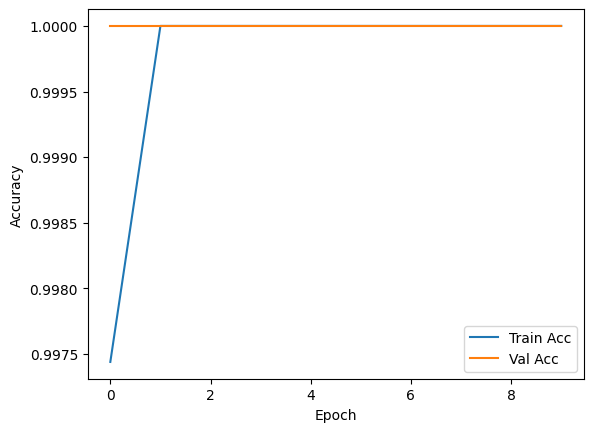

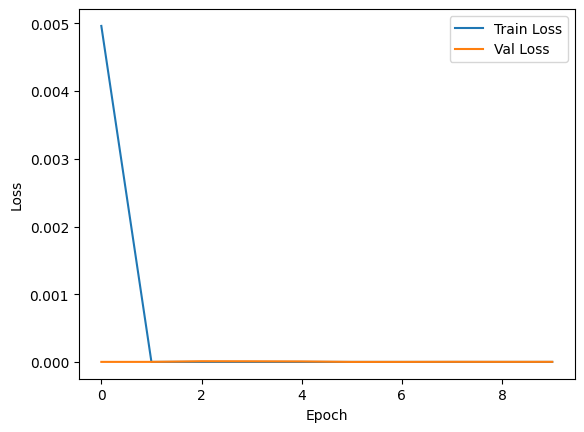

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

296/296 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9000
         1.0       1.00      1.00      1.00       454

    accuracy                           1.00      9454
   macro avg       1.00      1.00      1.00      9454
weighted avg       1.00      1.00      1.00      9454



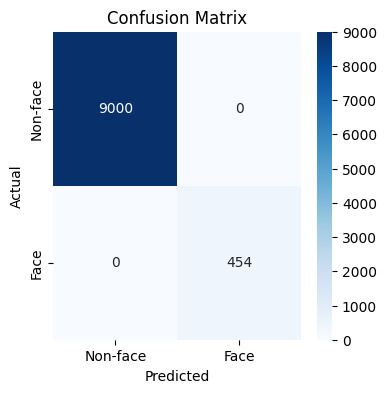

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
y_pred_probs = model.predict(X_test_cnn)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-face','Face'], yticklabels=['Non-face','Face'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()